In [1]:
import sys, os
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
df_all = pd.read_csv('merged_sorted_r277_mpc_8_24_2021.csv')
#df_all.sort_values(by=['Family_ID','Age_in_Yrs'])
df_all.sort_values(by=['Family_ID'], inplace=True)
df_all

,Subject,Age_in_Yrs,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,Race,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Gender
374,257946,28,True,NotTwin,,50263_80216,50263,80216,NaN,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,F
220,962058,26,True,NotTwin,,50263_80216,50263,80216,NaN,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,M
185,571144,25,True,NotTwin,,50371_80310,50371,80310,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,M
161,213017,25,True,NotTwin,,50373_80312,50373,80312,NaN,Unknown or Not Reported,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,M
71,517239,23,True,NotTwin,,50373_80312,50373,80312,NaN,White,...,1.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0,3.0,M
11,812746,22,True,NotTwin,,50406_80340,50406,80340,NaN,White,...,5.0,2.0,5.0,5.0,0.0,1.0,0.0,2.0,5.0,M
198,589567,25,True,NotTwin,,50406_80340,50406,80340,NaN,Unknown or Not Reported,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,M
92,237334,23,True,NotTwin,,50532_80448,50532,80448,NaN,Unknown or Not Reported,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0,F
230,213421,26,True,NotTwin,,50532_80448,50532,80448,NaN,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,F
511,171431,29,True,NotTwin,,51090_80960_99983,51090,99983,NaN,Black or African Am.,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,F


In [16]:
set_one = {'Subject': [], 'Family_ID' : []}
set_two = {'Subject': [], 'Family_ID' : []}
set_three = {'Subject': [], 'Family_ID' : []}
for subject in df_all['Subject']:
    #get family id
    fam_id = df_all[df_all['Subject'] == subject]['Family_ID'].values[0]
    if fam_id not in set_one['Family_ID']:
        set_one['Subject'].append(subject); set_one['Family_ID'].append(fam_id)
    elif fam_id not in set_two['Family_ID']:
        set_two['Subject'].append(subject); set_two['Family_ID'].append(fam_id)
    elif fam_id not in set_three['Family_ID']:
        set_three['Subject'].append(subject); set_three['Family_ID'].append(fam_id)

print('Set one has',len(set_one['Subject']), 'subjects and', len(np.unique(set_one['Family_ID'])), 'family ids')
print('Set two has',len(set_two['Subject']), 'subjects and', len(np.unique(set_two['Family_ID'])), 'family ids')
print('Set three has',len(set_three['Subject']), 'subjects and', len(np.unique(set_three['Family_ID'])), 'family ids')

print('a total of', np.sum([len(set_one['Subject']), len(set_two['Subject']),
                          len(set_three['Subject'])]), 'out of', len(df_all))
      
#create dataframes for each set - full data merged with list of ids built above
df_set_one = pd.merge(df_all,pd.DataFrame(set_one),how='inner',on=['Subject','Family_ID'])
df_set_two = pd.merge(df_all,pd.DataFrame(set_two),how='inner',on=['Subject','Family_ID'])
df_set_three = pd.merge(df_all,pd.DataFrame(set_three),how='inner',on=['Subject','Family_ID'])

Set one has 384 subjects and 384 family ids
Set two has 295 subjects and 295 family ids
Set three has 151 subjects and 151 family ids
a total of 830 out of 872


checking ages
set one
28.6328125 3.769127110244106
set two
28.640677966101695 3.6813372038104
set three
28.271523178807946 3.635610800380982


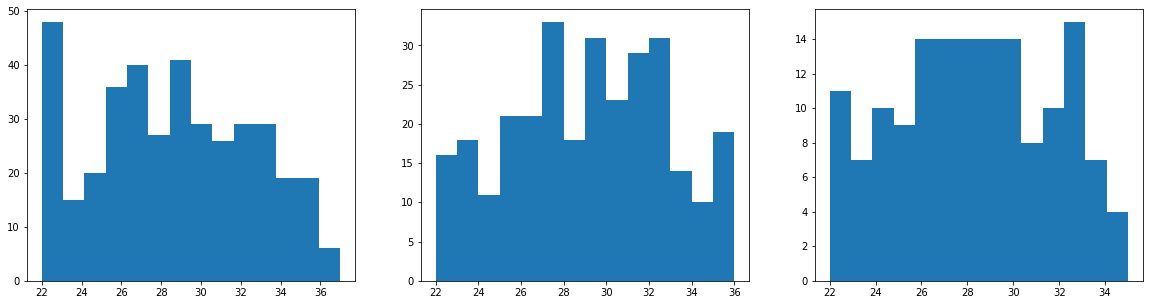

In [18]:
#demographics check - what are the age and sex distributions like

#set one
print("checking ages")
print("set one")
print(np.mean(df_set_one['Age_in_Yrs'].values), np.std(df_set_one['Age_in_Yrs'].values))

print("set two")
print(np.mean(df_set_two['Age_in_Yrs'].values), np.std(df_set_two['Age_in_Yrs'].values))

print("set three")
print(np.mean(df_set_three['Age_in_Yrs'].values), np.std(df_set_three['Age_in_Yrs'].values))

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_set_one['Age_in_Yrs'].values.flatten(),bins=14)
ax[1].hist(df_set_two['Age_in_Yrs'].values.flatten(),bins=14)
ax[2].hist(df_set_three['Age_in_Yrs'].values.flatten(),bins=14)
plt.show()

checking gender
set one
202 F 52.604166666666664 %
set two
154 F 52.20338983050847 %
set three
75 F 49.668874172185426 %


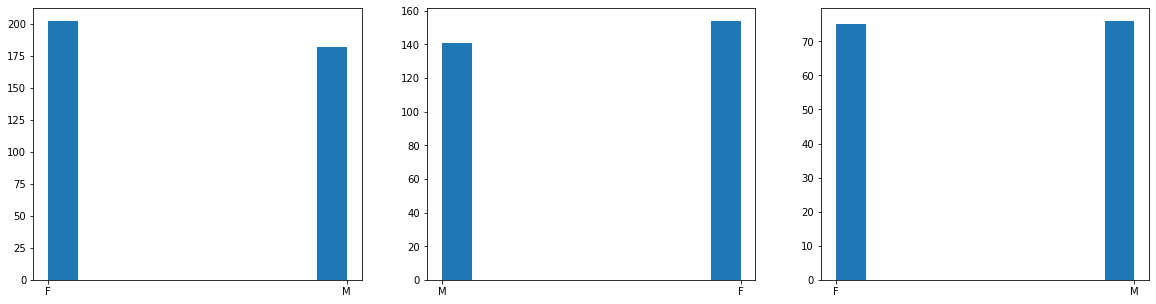

In [19]:
print("checking gender")
print("set one")
print(np.sum(df_set_one['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_one['Gender'] == 'F'),len(df_set_one)) *100, '%')

print("set two")
print(np.sum(df_set_two['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_two['Gender'] == 'F'),len(df_set_two)) *100, '%')

print("set three")
print(np.sum(df_set_three['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_three['Gender'] == 'F'),len(df_set_three)) *100, '%')

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_set_one['Gender'].values.flatten())
ax[1].hist(df_set_two['Gender'].values.flatten())
ax[2].hist(df_set_three['Gender'].values.flatten())
plt.show()

In [20]:
#am content with the number and age/sex distribution, write out
df_set_one.sort_values(by='Age_in_Yrs', inplace=True)
df_set_one.to_csv('merged_sorted_r277_unrelated_setA_n384.csv', index=False)

df_set_two.sort_values(by='Age_in_Yrs', inplace=True)
df_set_two.to_csv('merged_sorted_r277_unrelated_setB_n295.csv', index=False)

df_set_three.sort_values(by='Age_in_Yrs', inplace=True)
df_set_three.to_csv('merged_sorted_r277_unrelated_setC_n151.csv', index=False)